In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
import tqdm
import time
from matplotlib.patches import Rectangle

In [2]:
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder

In [32]:
finder = LeagueGameFinder(league_id_nullable='00', season_type_nullable='Regular Season', season_nullable='2020-21')

In [7]:
schedule_df = finder.get_data_frames()[0]

In [8]:
from nba_api.stats.endpoints.leaguedashoppptshot import LeagueDashOppPtShot


## Retrieving opp wide shot pct

In [33]:
opp_data = LeagueDashOppPtShot(per_mode_simple='PerGame', season='2020-21', close_def_dist_range_nullable='6+ Feet - Wide Open')
wide_open_opp_df = opp_data.get_data_frames()[0]

### Retrieving wide open shot

In [10]:
from nba_api.stats.endpoints.leaguedashteamptshot import LeagueDashTeamPtShot


In [34]:
wide_open_df = LeagueDashTeamPtShot(per_mode_simple='PerGame', season='2020-21', close_def_dist_range_nullable='6+ Feet - Wide Open').get_data_frames()[0]

In [12]:
matchups = schedule_df.loc[schedule_df.TEAM_ID == 1610612761].MATCHUP.tolist()

In [13]:
import re

In [14]:
opponents = [re.split("@ | vs.", item)[1].strip() for item in matchups]

In [15]:
fga = 0
fgm = 0
for opp in opponents:
    fga += wide_open_df.loc[wide_open_df.TEAM_ABBREVIATION == opp].FG3A.iloc[0]
    fgm += wide_open_df.loc[wide_open_df.TEAM_ABBREVIATION == opp].FG3M.iloc[0]

In [29]:
fga

122.63999999999999

## Calculation

In [16]:
matchups = schedule_df.loc[schedule_df.TEAM_ID == 1610612764].MATCHUP.tolist()
opponents = set([re.split("@ | vs.", item)[1].strip() for item in matchups])
fga = 0
fgm = 0
for opp in opponents:
    cur_fga = wide_open_df.loc[wide_open_df.TEAM_ABBREVIATION == opp].FG3A.iloc[0]
    cur_fgm = wide_open_df.loc[wide_open_df.TEAM_ABBREVIATION == opp].FG3M.iloc[0]
    print(f"{opp}, FG3M: {cur_fgm}, FG3A: {cur_fga}")

LAL, FG3M: 6.27, FG3A: 16.61
IND, FG3M: 5.62, FG3A: 15.11
SAC, FG3M: 6.56, FG3A: 17.1
MIA, FG3M: 5.92, FG3A: 14.69
POR, FG3M: 5.16, FG3A: 12.86
ORL, FG3M: 5.71, FG3A: 15.63
MIL, FG3M: 7.79, FG3A: 21.28
BOS, FG3M: 5.69, FG3A: 14.33
DEN, FG3M: 5.97, FG3A: 14.93
HOU, FG3M: 7.49, FG3A: 20.08
BKN, FG3M: 5.81, FG3A: 15.54
PHX, FG3M: 6.96, FG3A: 18.26
CLE, FG3M: 5.95, FG3A: 15.8
CHA, FG3M: 5.56, FG3A: 14.45
NOP, FG3M: 6.42, FG3A: 15.85
LAC, FG3M: 5.47, FG3A: 13.76
UTA, FG3M: 7.38, FG3A: 17.46
SAS, FG3M: 5.11, FG3A: 13.1
OKC, FG3M: 5.6, FG3A: 14.93
ATL, FG3M: 6.69, FG3A: 18.1
DET, FG3M: 5.28, FG3A: 13.6
DAL, FG3M: 7.66, FG3A: 19.36
CHI, FG3M: 6.89, FG3A: 18.63
MIN, FG3M: 6.88, FG3A: 18.69
MEM, FG3M: 6.67, FG3A: 17.04
NYK, FG3M: 4.17, FG3A: 12.11
PHI, FG3M: 6.23, FG3A: 16.1
TOR, FG3M: 7.63, FG3A: 18.59
GSW, FG3M: 4.85, FG3A: 13.98


In [17]:
wide_open_by_opponents = []

for i in range(len(wide_open_opp_df)):
    team_id = wide_open_opp_df.iloc[i].TEAM_ID
    matchups = schedule_df.loc[schedule_df.TEAM_ID == team_id].MATCHUP.tolist()
    opponents = set([re.split("@ | vs.", item)[1].strip() for item in matchups])
    fga = 0
    fgm = 0
    for opp in opponents:
        fga += wide_open_df.loc[wide_open_df.TEAM_ABBREVIATION == opp].FG3A.iloc[0]
        fgm += wide_open_df.loc[wide_open_df.TEAM_ABBREVIATION == opp].FG3M.iloc[0]
    wide_open_by_opponents.append(fgm/fga)

In [18]:
wide_open_opp_df.loc[:, 'OPP_WIDE_OPEN_FG3_PCT'] = wide_open_by_opponents

In [19]:
plt.style.use('fivethirtyeight')

In [20]:
wide_open_opp_df.loc[:, 'OPP_WIDE_OPEN_FG3_PCT'] = wide_open_opp_df.OPP_WIDE_OPEN_FG3_PCT * 100
wide_open_opp_df.loc[:, 'FG3_PCT'] = wide_open_opp_df.FG3_PCT * 100

In [21]:
diff = wide_open_opp_df.FG3_PCT - wide_open_opp_df.OPP_WIDE_OPEN_FG3_PCT

In [22]:
wide_open_opp_df.loc[:, 'DIFF'] = diff

In [23]:
wide_open_opp_df

,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,GP,G,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT,OPP_WIDE_OPEN_FG3_PCT,DIFF
0,1610612749,Milwaukee Bucks,MIL,72,72,0.264,9.76,24.79,0.394,0.552,0.042,1.93,3.90,0.495,0.223,7.83,20.89,37.5,38.475586,-0.975586
1,1610612751,Brooklyn Nets,BKN,72,72,0.245,9.32,22.69,0.411,0.553,0.059,2.85,5.44,0.523,0.186,6.47,17.25,37.5,38.426522,-0.926522
2,1610612761,Toronto Raptors,TOR,71,71,0.253,8.35,22.28,0.375,0.531,0.029,1.38,2.56,0.538,0.224,6.97,19.72,35.4,38.286468,-2.886468
3,1610612757,Portland Trail Blazers,POR,73,73,0.230,9.12,20.97,0.435,0.606,0.039,1.96,3.56,0.550,0.191,7.16,17.41,41.1,38.345431,2.754569
4,1610612763,Memphis Grizzlies,MEM,73,73,0.231,8.56,20.86,0.410,0.568,0.039,2.00,3.49,0.573,0.193,6.56,17.37,37.8,38.365430,-0.565430
5,1610612747,Los Angeles Lakers,LAL,71,71,0.239,9.01,20.77,0.434,0.591,0.052,2.51,4.49,0.558,0.187,6.51,16.28,40.0,38.416012,1.583988
6,1610612759,San Antonio Spurs,SAS,70,70,0.230,8.97,20.66,0.434,0.599,0.039,2.19,3.46,0.632,0.192,6.79,17.20,39.5,38.375769,1.124231
7,1610612742,Dallas Mavericks,DAL,73,73,0.226,8.30,20.62,0.403,0.552,0.039,2.15,3.60,0.597,0.187,6.15,17.01,36.2,38.343797,-2.143797
8,1610612766,Charlotte Hornets,CHA,64,64,0.234,8.52,20.39,0.418,0.579,0.034,1.94,2.98,0.649,0.200,6.58,17.41,37.8,38.390352,-0.590352
9,1610612744,Golden State Warriors,GSW,65,65,0.231,9.32,20.31,0.459,0.639,0.036,2.02,3.18,0.633,0.195,7.31,17.12,42.7,38.503681,4.196319


In [24]:
lucky = wide_open_opp_df.loc[wide_open_opp_df.DIFF < -0.5]
unlucky = wide_open_opp_df.loc[wide_open_opp_df.DIFF > 0.5]
neutral = wide_open_opp_df.loc[(wide_open_opp_df.DIFF >= -0.5) & (wide_open_opp_df.DIFF <= 0.5)]

In [25]:
plt.style.use('fivethirtyeight')

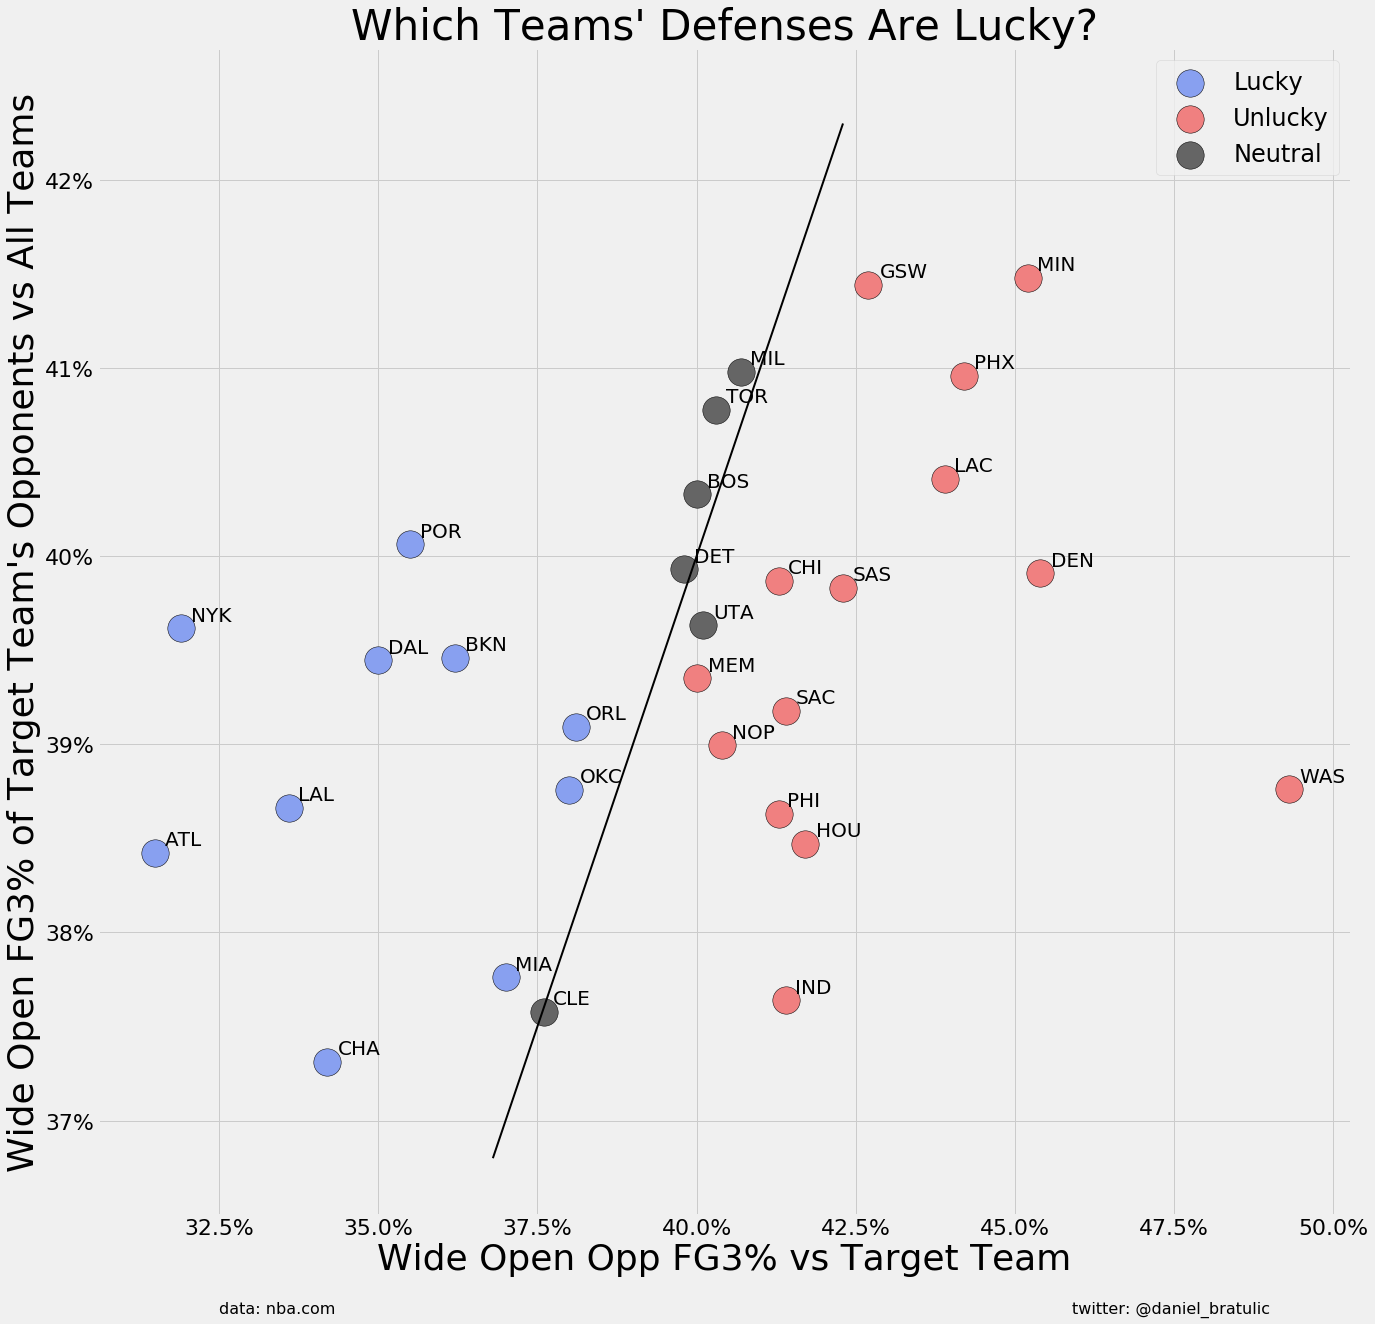

In [65]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=lucky.FG3_PCT, y=lucky.OPP_WIDE_OPEN_FG3_PCT, s=750, edgecolors='black', color='#88A0F0', label='Lucky')
ax.scatter(x=unlucky.FG3_PCT, y=unlucky.OPP_WIDE_OPEN_FG3_PCT, s=750, edgecolors='black', color='#F08080', label='Unlucky')
ax.scatter(x=neutral.FG3_PCT, y=neutral.OPP_WIDE_OPEN_FG3_PCT, s=750, edgecolors='black', color='#656565', label='Neutral')

texts = []
for i in range(len(wide_open_opp_df)):
    item = wide_open_opp_df.iloc[i]
    texts.append(ax.text(x=item.FG3_PCT, y=item.OPP_WIDE_OPEN_FG3_PCT, s=item.TEAM_ABBREVIATION, fontsize=20))

ax.set_ylabel("Wide Open FG3% vs All Teams", size=36)
ax.set_xlabel("Wide Open Opp FG3% vs Target Team", size=36)
ax.set_title("Which Teams' Defenses Are Lucky?", size=42)

adjust_text(texts, expand_points=(1.5, 1.5))

#ax.axhline(y=0.39, xmin=0, xmax=1, color='black', lw=2)
#ax.axvline(x=0.39, ymin=0, ymax=1, color='black', lw=2)
ax.plot(np.arange(36.8, 42.5, 0.25), np.arange(36.8, 42.5, 0.25), color='black', lw=2)
ax.set_yticklabels([f"{item}%" for item in range(36, 43)], size=22)
ax.set_xticklabels([f"{item.get_text()}%" for item in ax.get_xticklabels()], size=22)
#ax.set_xticklabels([f"{item.get_text()}%" for item in ax.get_xticklabels()], size=22)
ax.set_ylim(36.5, 42.7)
ax.text(x=49, y=36.0, s='twitter: @daniel_bratulic', ha='right', va='center', size=16)
ax.text(x=32.5, y=36, s='data: nba.com', ha='left', va='center', size=16)
#ax.annotate('Luckier', xy=(42, 42.1), xytext=(40, 42.1),
#            arrowprops=dict(color='black', arrowstyle='<-', lw=1.5), color='black', size=18, ha='right')

#ax.annotate('Unluckier', xy=(42.2, 42.1), xytext=(44.2, 42.1),
#            arrowprops=dict(color='black', arrowstyle='<-', lw=1.5), color='black', size=18, ha='left')
ax.legend(fontsize=24)


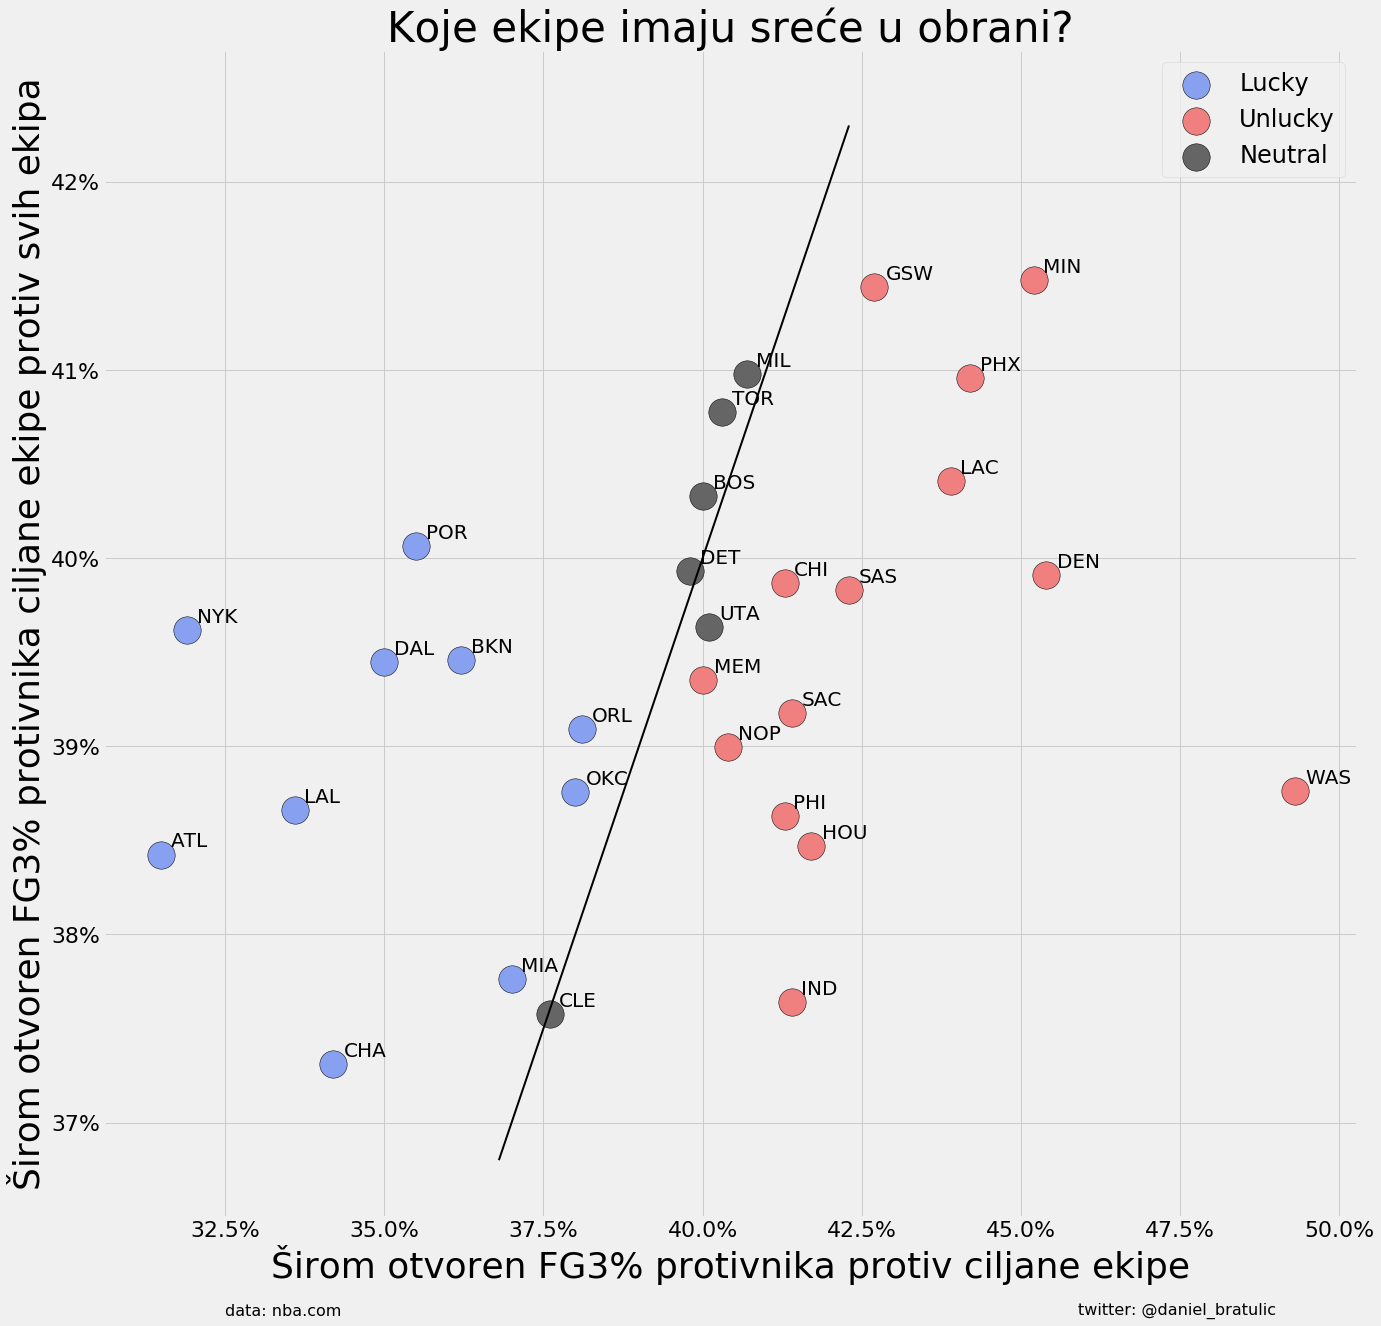

In [56]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=lucky.FG3_PCT, y=lucky.OPP_WIDE_OPEN_FG3_PCT, s=750, edgecolors='black', color='#88A0F0', label='Lucky')
ax.scatter(x=unlucky.FG3_PCT, y=unlucky.OPP_WIDE_OPEN_FG3_PCT, s=750, edgecolors='black', color='#F08080', label='Unlucky')
ax.scatter(x=neutral.FG3_PCT, y=neutral.OPP_WIDE_OPEN_FG3_PCT, s=750, edgecolors='black', color='#656565', label='Neutral')

texts = []
for i in range(len(wide_open_opp_df)):
    item = wide_open_opp_df.iloc[i]
    texts.append(ax.text(x=item.FG3_PCT, y=item.OPP_WIDE_OPEN_FG3_PCT, s=item.TEAM_ABBREVIATION, fontsize=20))

ax.set_ylabel("Širom otvoren FG3% protivnika ciljane ekipe protiv svih ekipa", size=36)
ax.set_xlabel("Širom otvoren FG3% protivnika protiv ciljane ekipe", size=36)
ax.set_title("Koje ekipe imaju sreće u obrani?", size=42)

adjust_text(texts, expand_points=(1.5, 1.5))

#ax.axhline(y=0.39, xmin=0, xmax=1, color='black', lw=2)
#ax.axvline(x=0.39, ymin=0, ymax=1, color='black', lw=2)
ax.plot(np.arange(36.8, 42.5, 0.25), np.arange(36.8, 42.5, 0.25), color='black', lw=2)
ax.set_yticklabels([f"{item}%" for item in range(36, 43)], size=22)
ax.set_xticklabels([f"{item.get_text()}%" for item in ax.get_xticklabels()], size=22)
#ax.set_xticklabels([f"{item.get_text()}%" for item in ax.get_xticklabels()], size=22)
ax.set_ylim(36.5, 42.7)
ax.text(x=49, y=36.0, s='twitter: @daniel_bratulic', ha='right', va='center', size=16)
ax.text(x=32.5, y=36, s='data: nba.com', ha='left', va='center', size=16)
#ax.annotate('Luckier', xy=(42, 42.1), xytext=(40, 42.1),
#            arrowprops=dict(color='black', arrowstyle='<-', lw=1.5), color='black', size=18, ha='right')

#ax.annotate('Unluckier', xy=(42.2, 42.1), xytext=(44.2, 42.1),
#            arrowprops=dict(color='black', arrowstyle='<-', lw=1.5), color='black', size=18, ha='left')
ax.legend(fontsize=24)


## Table

In [26]:
from PIL import Image

In [27]:
id_abr = wide_open_opp_df.loc[:, ['TEAM_ID', 'TEAM_ABBREVIATION']]
team_mappings = {}
for index in range(len(id_abr)):
    item = id_abr.iloc[index]
    team_mappings[str(item.TEAM_ID)] = item.TEAM_ABBREVIATION.lower()

In [28]:
team_imgs = {}
for i in tqdm.tqdm(range(len(wide_open_opp_df))):
    item = wide_open_opp_df.iloc[i]
    team_logo = team_mappings[str(item.TEAM_ID)]
    img = Image.open(f'../../team_logos/{team_logo}.png')
    team_imgs[item.TEAM_ID] = img

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 113.61it/s]


In [29]:
wide_open_opp_df.head()

,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,GP,G,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT,OPP_WIDE_OPEN_FG3_PCT,DIFF
0,1610612749,Milwaukee Bucks,MIL,72,72,0.264,9.76,24.79,0.394,0.552,0.042,1.93,3.90,0.495,0.223,7.83,20.89,37.5,38.475586,-0.975586
1,1610612751,Brooklyn Nets,BKN,72,72,0.245,9.32,22.69,0.411,0.553,0.059,2.85,5.44,0.523,0.186,6.47,17.25,37.5,38.426522,-0.926522
2,1610612761,Toronto Raptors,TOR,71,71,0.253,8.35,22.28,0.375,0.531,0.029,1.38,2.56,0.538,0.224,6.97,19.72,35.4,38.286468,-2.886468
3,1610612757,Portland Trail Blazers,POR,73,73,0.230,9.12,20.97,0.435,0.606,0.039,1.96,3.56,0.550,0.191,7.16,17.41,41.1,38.345431,2.754569
4,1610612763,Memphis Grizzlies,MEM,73,73,0.231,8.56,20.86,0.410,0.568,0.039,2.00,3.49,0.573,0.193,6.56,17.37,37.8,38.365430,-0.565430


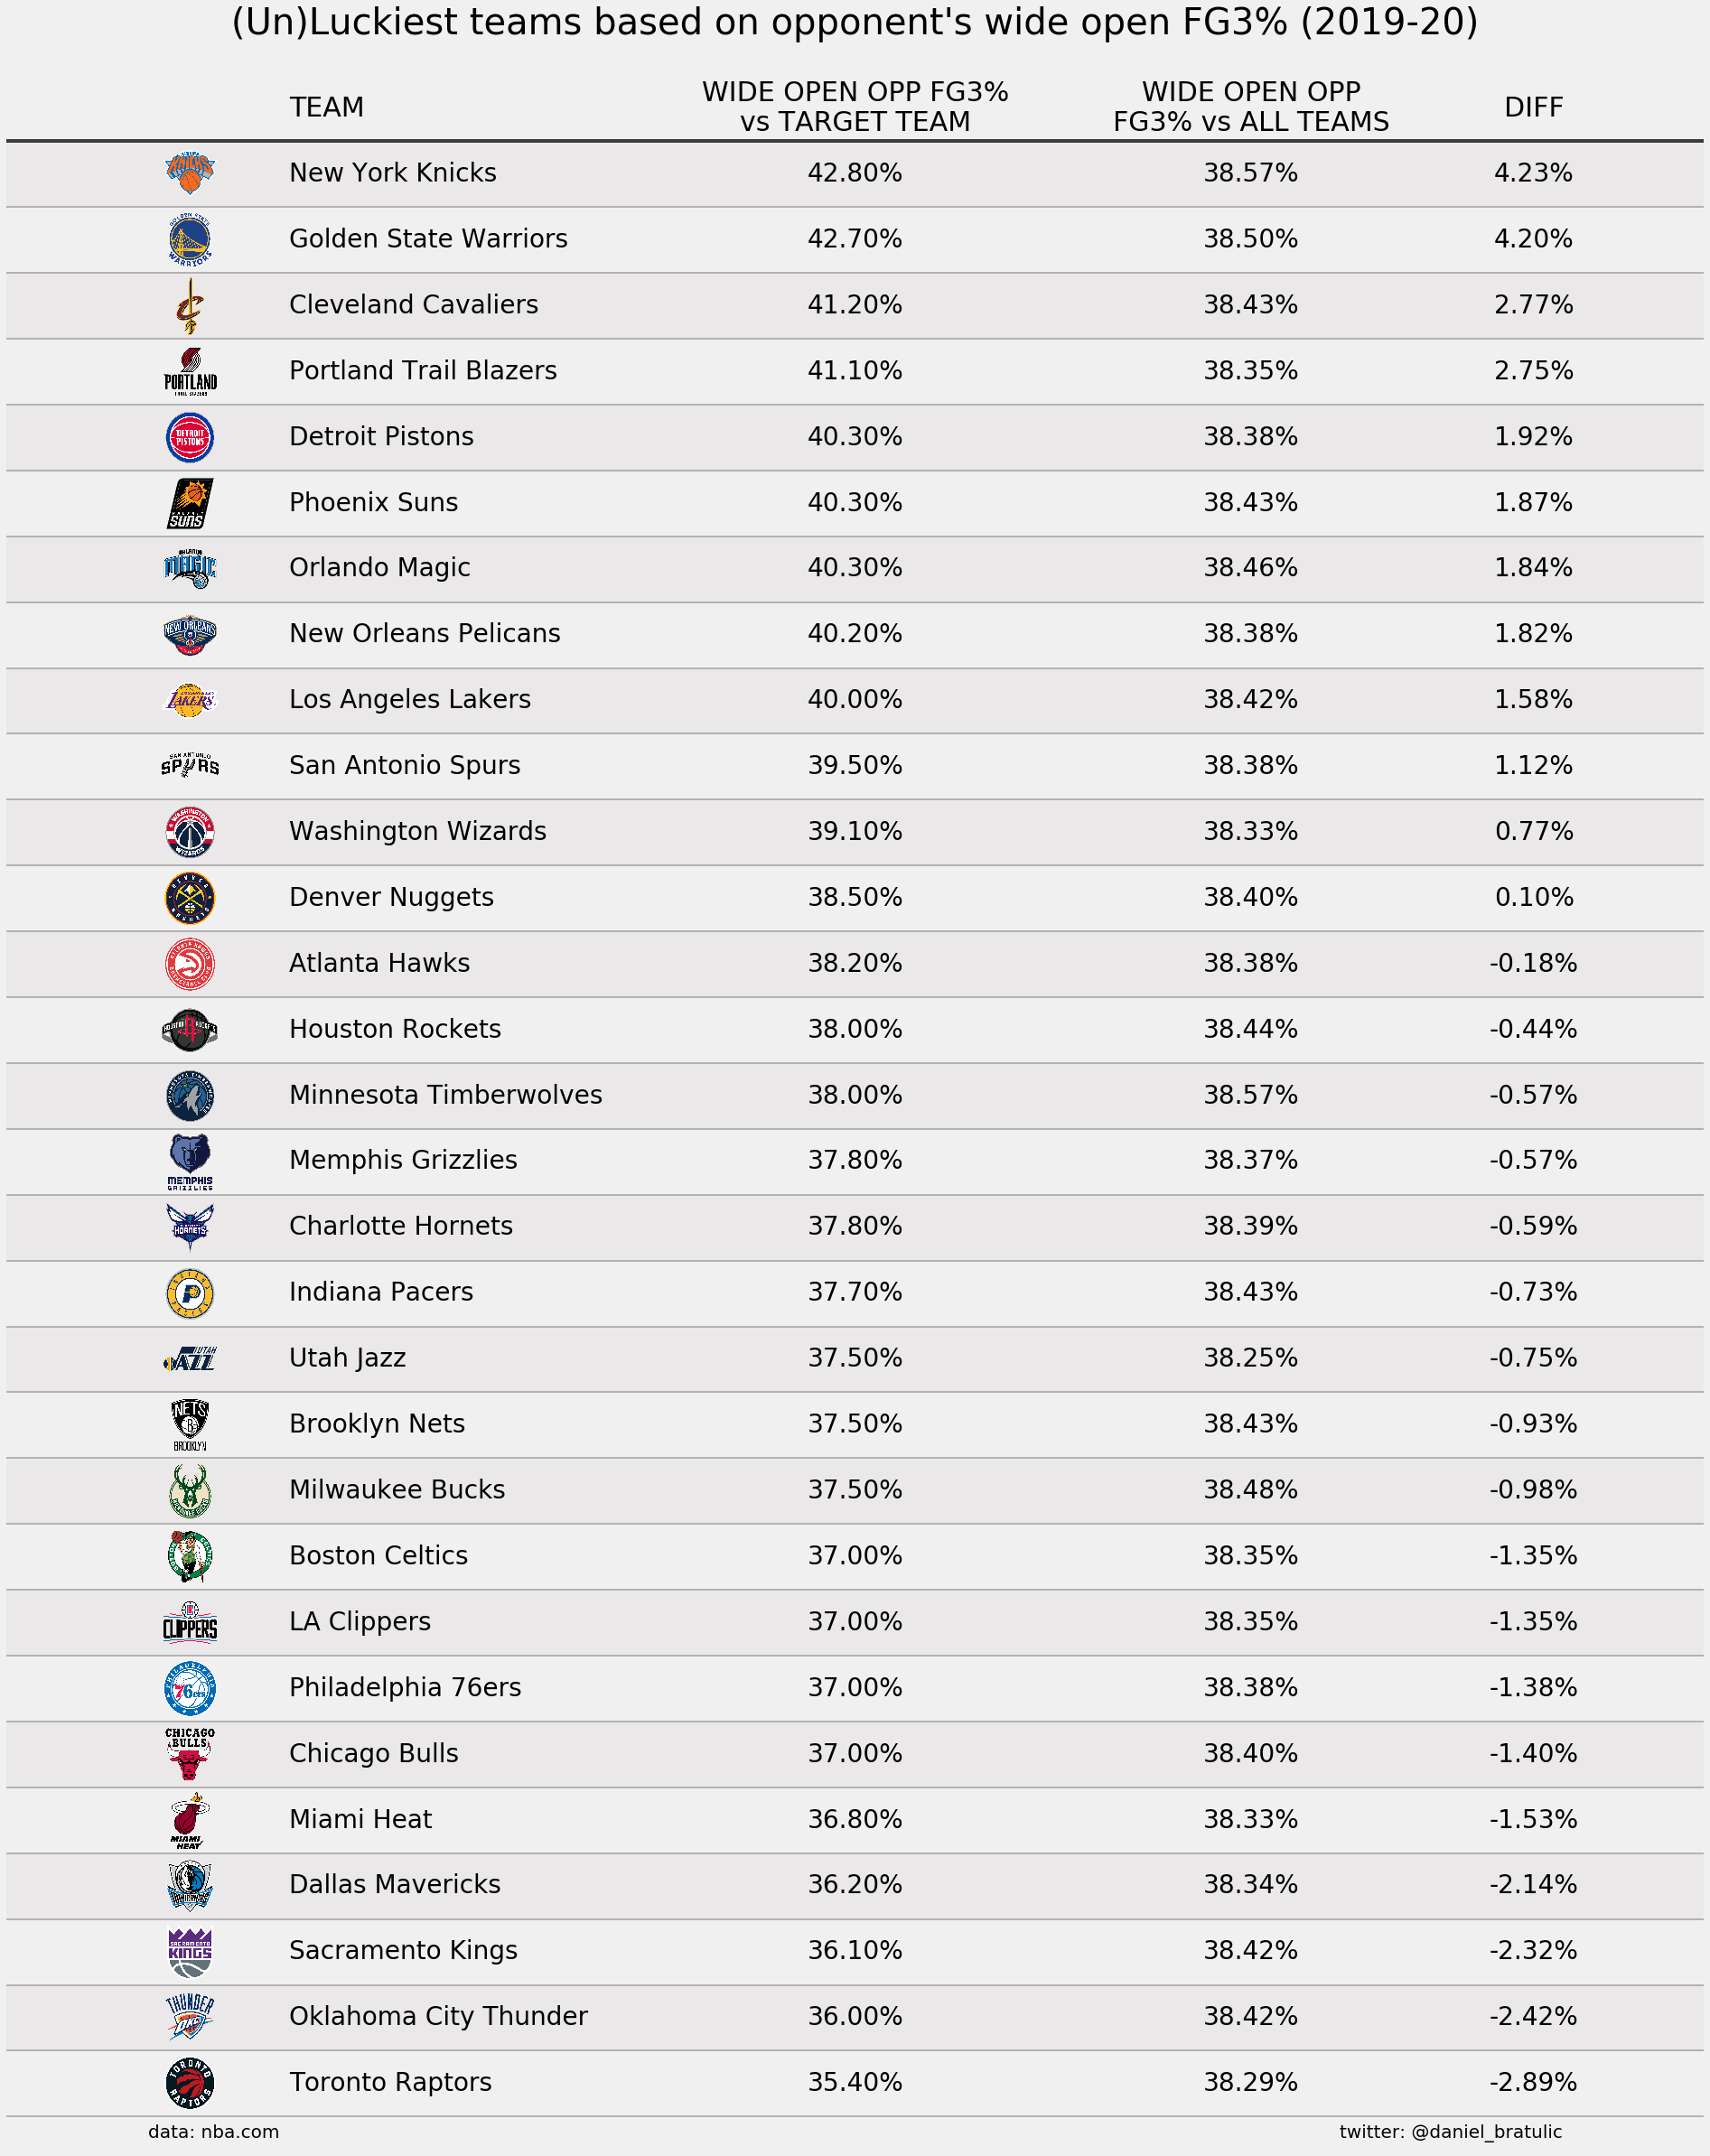

In [31]:
fig, ax = plt.subplots(figsize=(30, 40))
font_size = 28
font_title = 30
top = len(wide_open_opp_df)
#top = 10

sorted_open_df = wide_open_opp_df.sort_values(by='DIFF', ascending=False)
for i in range(top):
    item = sorted_open_df.iloc[i]
    y_coord = top - i - 1
    if i % 2 == 1:
        color = '#EAE8E8'
        rect = Rectangle((-4.5, y_coord + 0.5), width=15, height=1, fill=True, color=color)
        ax.add_patch(rect)
    ax.text(x=0.5, y=y_coord, ha='left', va='center', s=item.TEAM_NAME, size=font_size)
    ax.axhline(y=y_coord-0.5, xmin=-0.25, xmax=10, color='#A0A0A0', alpha=0.75, lw=2)
    
    ax.text(x=2.2, y=y_coord, ha='center', va='center', s=f"{item.OPP_WIDE_OPEN_FG3_PCT:.2f}%", size=font_size)
    ax.text(x=1.5, y=y_coord, ha='center', va='center', s=f"{item.FG3_PCT:.2f}%", size=font_size)
    ax.text(x=2.7, y=y_coord, ha='center', va='center', s=f"{item.DIFF:.2f}%", size=font_size)
    #ax.text(x=3.2, y=y_coord, ha='center', va='center', s=item.MIN, size=font_size)
    #ax.text(x=3.6, y=y_coord, ha='center', va='center', s=item.POINTS, size=font_size)
    #ax.text(x=4, y=y_coord, ha='center', va='center', s=f"{item.SVI:.2f}", size=font_size)
    

    #ax.imshow(player_imgs[item.PLAYER_ID], extent=(0, 0.3, y_coord-0.5,y_coord + 0.5), aspect='auto', zorder=1)
    ax.imshow(team_imgs[item.TEAM_ID], extent=(0.27, 0.38, y_coord-0.5,y_coord + 0.5), aspect='auto', zorder=1)
    
    #y_img_start = y_coord-0.5 + (1 - 0.730769232) / 2
    #ax.imshow(img, extent=(0, 1.36, y_img_start-0.5, y_img_start + 0.1), aspect='auto')
    #ax.imshow(img, extent=(0, 260, 0, 190), aspect=260/190)
    
ax.text(x=0.5, y=top, s='TEAM', ha='left', va='center', size=font_title)
ax.text(x=2.2, y=top, ha='center', va='center', s="WIDE OPEN OPP\nFG3% vs ALL TEAMS", size=font_title)
ax.text(x=1.5, y=top, ha='center', va='center', s="WIDE OPEN OPP FG3%\nvs TARGET TEAM", size=font_title)
ax.text(x=2.7, y=top, ha='center', va='center', s="DIFF", size=font_title)

ax.text(x=2.75, y=-0.75, s='twitter: @daniel_bratulic', ha='right', va='center', size=20)
ax.text(x=0.25, y=-0.75, s='data: nba.com', ha='left', va='center', size=20)
ax.axhline(y=top-0.5, xmin=-0.25, xmax=10, color='black', alpha=0.75, lw=4)
ax.set_title("(Un)Luckiest teams based on opponent's wide open FG3% (2019-20)", size=40)
    
ax.set_ylim(bottom=-1, top=top+1)
ax.set_xlim(left=-0, right=3)
ax.grid(False)
ax.set_frame_on(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig('table_wo_luck_2019_20.png', dpi=120, bbox_inches='tight')

## Historical numbers on this

In [177]:
hist_opp = LeagueDashOppPtShot(per_mode_simple='PerGame', season='2020-21', close_def_dist_range_nullable='6+ Feet - Wide Open')


In [179]:

hist_df = hist_opp.get_data_frames()[0]

In [182]:
hist_df.FG3_PCT.mean()

0.3966666666666667

In [186]:
hist_df.FG3_PCT.std()

0.041117437640992655

In [187]:
hist_df

,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,GP,G,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,1610612740,New Orleans Pelicans,NOP,9,9,0.341,12.11,29.33,0.413,0.597,0.031,1.33,2.67,0.500,0.310,10.78,26.67,0.404
1,1610612752,New York Knicks,NYK,9,9,0.282,9.22,25.00,0.369,0.513,0.026,2.00,2.33,0.857,0.256,7.22,22.67,0.319
2,1610612766,Charlotte Hornets,CHA,9,9,0.269,8.78,23.33,0.376,0.533,0.022,1.44,1.89,0.765,0.247,7.33,21.44,0.342
3,1610612751,Brooklyn Nets,BKN,10,10,0.242,8.70,23.10,0.377,0.515,0.056,2.30,5.40,0.426,0.185,6.40,17.70,0.362
4,1610612749,Milwaukee Bucks,MIL,9,9,0.248,10.11,22.78,0.444,0.615,0.040,2.33,3.67,0.636,0.208,7.78,19.11,0.407
5,1610612759,San Antonio Spurs,SAS,8,8,0.236,9.50,21.50,0.442,0.625,0.032,1.63,2.88,0.565,0.204,7.88,18.63,0.423
6,1610612765,Detroit Pistons,DET,9,9,0.247,9.44,21.44,0.440,0.611,0.035,2.11,3.00,0.704,0.213,7.33,18.44,0.398
7,1610612758,Sacramento Kings,SAC,9,9,0.235,9.67,21.33,0.453,0.622,0.043,2.44,3.89,0.629,0.192,7.22,17.44,0.414
8,1610612741,Chicago Bulls,CHI,10,10,0.241,9.30,21.30,0.437,0.620,0.027,1.50,2.40,0.625,0.214,7.80,18.90,0.413
9,1610612753,Orlando Magic,ORL,9,9,0.235,9.11,20.89,0.436,0.593,0.041,2.56,3.67,0.697,0.194,6.56,17.22,0.381


In [188]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2013, 2021)]

In [190]:
means = []
stds = []
for season in seasons:
    hist_opp = LeagueDashOppPtShot(per_mode_simple='PerGame', season=season, close_def_dist_range_nullable='6+ Feet - Wide Open')
    hist_df = hist_opp.get_data_frames()[0]
    means.append(hist_df.FG3_PCT.mean())
    stds.append(hist_df.FG3_PCT.std())
    time.sleep(0.4)

In [191]:
means

[0.3902333333333333,
 0.38149999999999995,
 0.38463333333333327,
 0.38263333333333344,
 0.3882,
 0.37986666666666663,
 0.3848333333333334,
 0.3966666666666667]

In [192]:
stds

[0.015825957144521466,
 0.01830159216740634,
 0.019520958380467756,
 0.018705491233828923,
 0.013737439404026884,
 0.015990801953824484,
 0.01951141722937754,
 0.041117437640992655]

In [193]:
import seaborn as sns

In [196]:
low_means = [means[i]-stds[i] for i in range(len(means))]

In [198]:
high_means = [means[i]+stds[i] for i in range(len(means))]

[Text(0, 0, '34%'),
 Text(0, 0, '36%'),
 Text(0, 0, '38%'),
 Text(0, 0, '40%'),
 Text(0, 0, '42%'),
 Text(0, 0, '44%')]

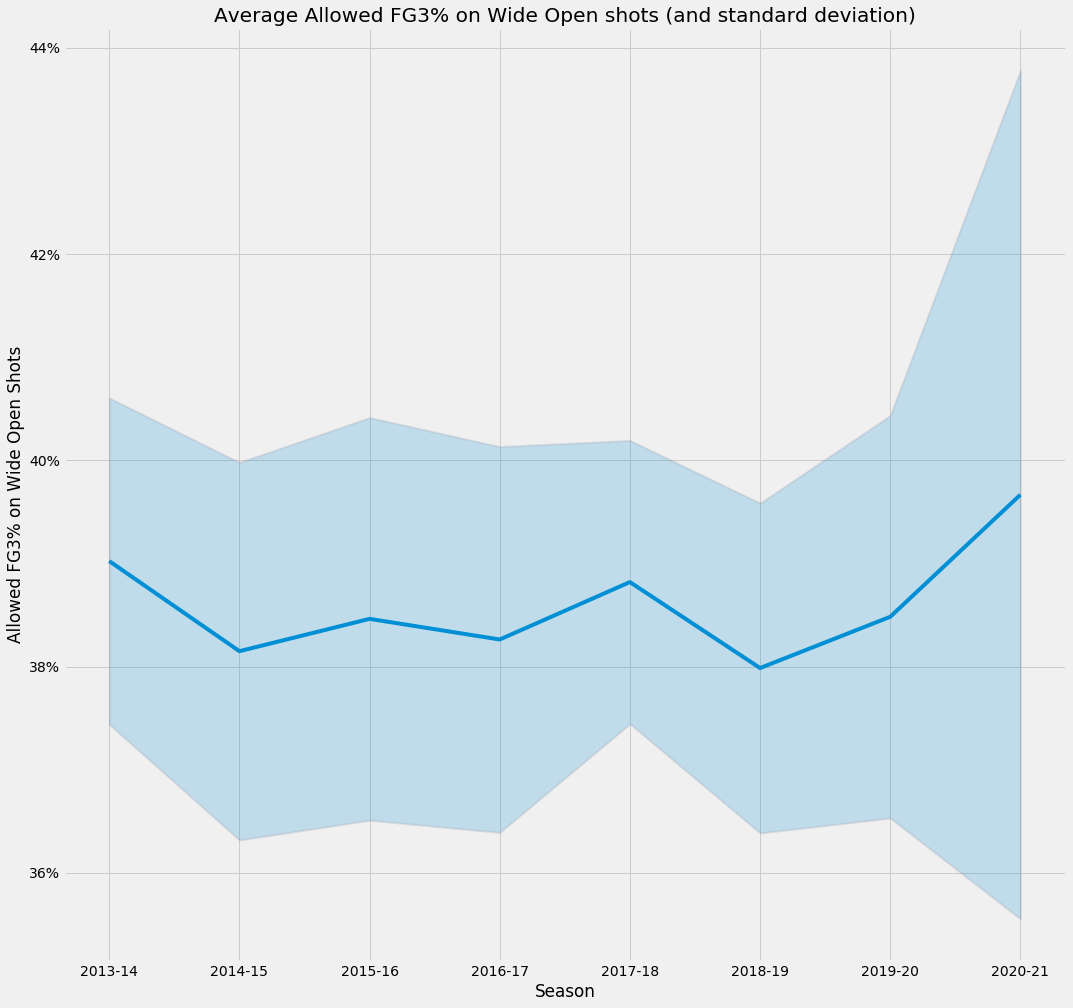

In [216]:
fig, ax = plt.subplots(figsize=(16, 16))

low_means = [means[i]-stds[i] for i in range(len(means))]

high_means = [means[i]+stds[i] for i in range(len(means))]

ax.plot(seasons, means)
ax.fill_between(x=seasons, y1=low_means, y2=high_means, alpha=0.2, edgecolor='#8b8ba0', lw=2)
ax.set_title("Average Allowed FG3% on Wide Open shots (and standard deviation)")
ax.set_ylabel("Allowed FG3% on Wide Open Shots")
ax.set_xlabel("Season")

ax.set_yticklabels([f"{item}%" for item in range(34, 46, 2)])

[Text(0, 0, '34%'),
 Text(0, 0, '36%'),
 Text(0, 0, '38%'),
 Text(0, 0, '40%'),
 Text(0, 0, '42%'),
 Text(0, 0, '44%')]

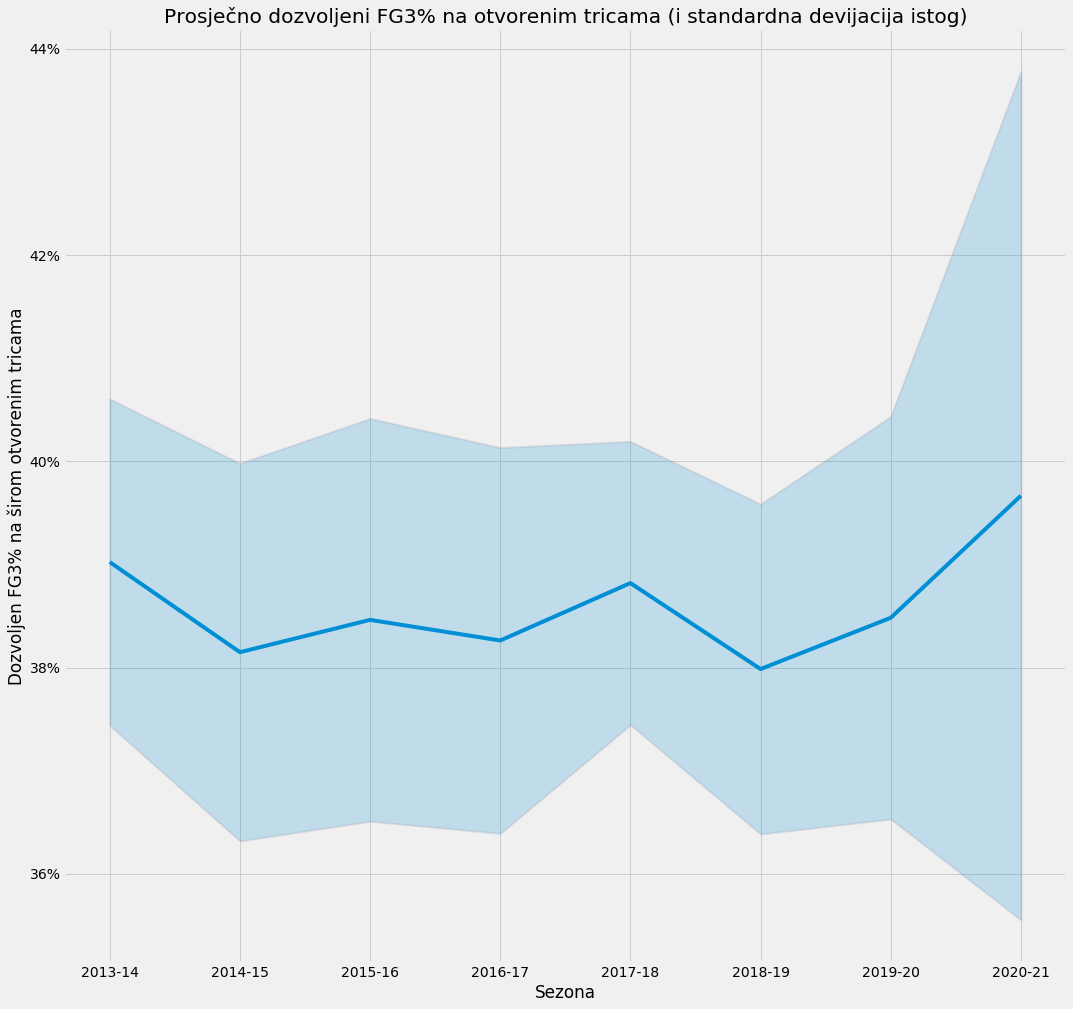

In [217]:
fig, ax = plt.subplots(figsize=(16, 16))

ax.plot(seasons, means)
ax.fill_between(x=seasons, y1=low_means, y2=high_means, alpha=0.2, edgecolor='#8b8ba0', lw=2)
ax.set_title("Prosječno dozvoljeni FG3% na otvorenim tricama (i standardna devijacija istog)")
ax.set_ylabel("Dozvoljen FG3% na širom otvorenim tricama")
ax.set_xlabel("Sezona")

ax.set_yticklabels([f"{item}%" for item in range(34, 46, 2)])

#### Only start of the season

In [229]:
means_start = []
stds_start = []
for season in seasons:
    if season == '2020-21':
        hist_opp = LeagueDashOppPtShot(per_mode_simple='PerGame', season=season, close_def_dist_range_nullable='6+ Feet - Wide Open')
    else:
        date_from = f"10/10/{season.split('-')[0]}"
        date_to = f"11/11/{season.split('-')[0]}"
        print(date_from)
        print(date_to)
        hist_opp = LeagueDashOppPtShot(per_mode_simple='PerGame', season=season, close_def_dist_range_nullable='6+ Feet - Wide Open', date_from_nullable=date_from, date_to_nullable=date_to)
    hist_df = hist_opp.get_data_frames()[0]
    means_start.append(hist_df.FG3_PCT.mean())
    stds_start.append(hist_df.FG3_PCT.std())
    time.sleep(0.4)

10/10/2013
11/11/2013
10/10/2014
11/11/2014
10/10/2015
11/11/2015
10/10/2016
11/11/2016
10/10/2017
11/11/2017
10/10/2018
11/11/2018
10/10/2019
11/11/2019


In [230]:
means_start

[0.38876666666666665,
 0.3826,
 0.3633,
 0.3798333333333334,
 0.3859666666666666,
 0.3764,
 0.37379999999999997,
 0.3966666666666667]

Text(0.5, 0, 'Sezona')

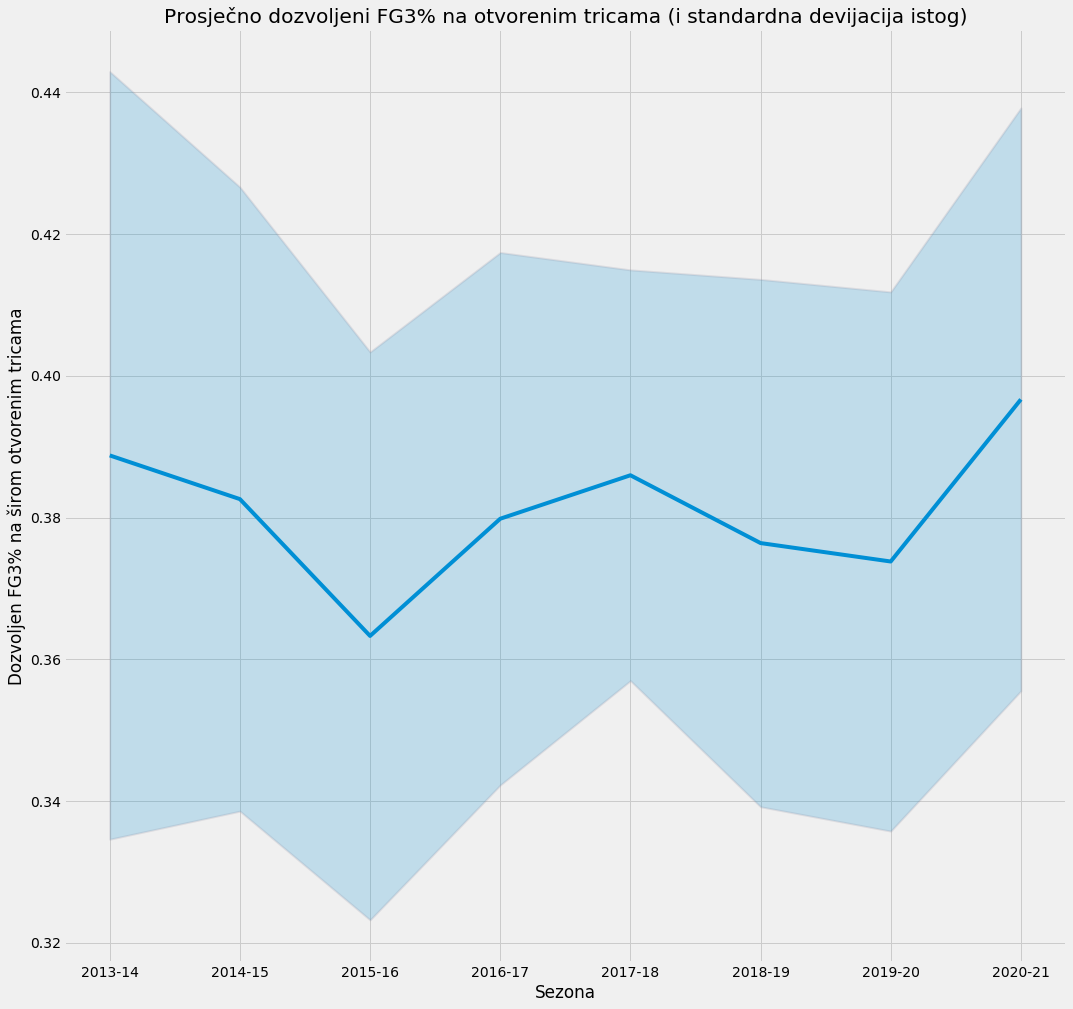

In [231]:
fig, ax = plt.subplots(figsize=(16, 16))

low_means = [means_start[i]-stds_start[i] for i in range(len(means))]

high_means = [means_start[i]+stds_start[i] for i in range(len(means))]

ax.plot(seasons, means_start)
ax.fill_between(x=seasons, y1=low_means, y2=high_means, alpha=0.2, edgecolor='#8b8ba0', lw=2)
ax.set_title("Prosječno dozvoljeni FG3% na otvorenim tricama (i standardna devijacija istog)")
ax.set_ylabel("Dozvoljen FG3% na širom otvorenim tricama")
ax.set_xlabel("Sezona")

#ax.set_yticklabels([f"{item}%" for item in range(34, 46, 2)])

[Text(0, 0, '34%'),
 Text(0, 0, '36%'),
 Text(0, 0, '38%'),
 Text(0, 0, '40%'),
 Text(0, 0, '42%'),
 Text(0, 0, '44%')]

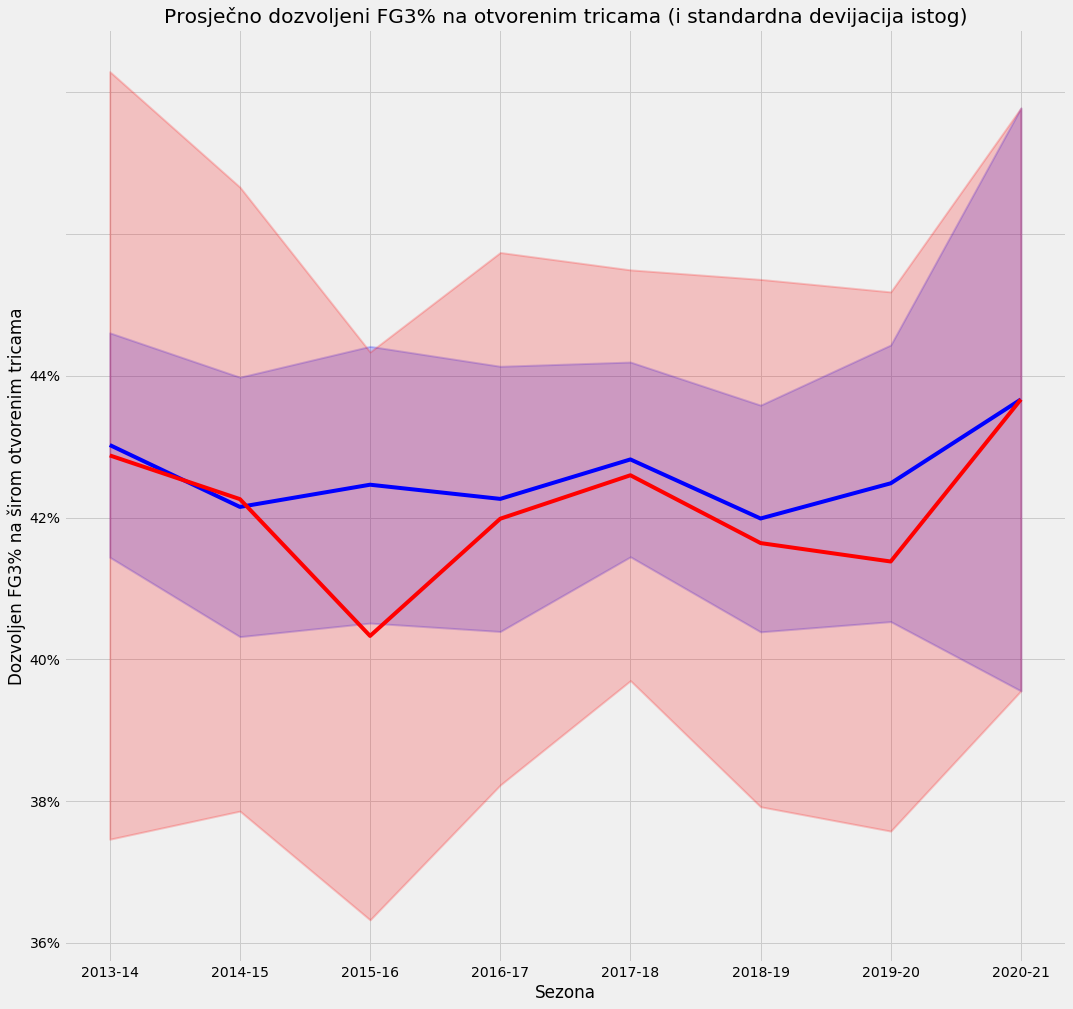

In [234]:
fig, ax = plt.subplots(figsize=(16, 16))


low_means = [means[i]-stds[i] for i in range(len(means))]

high_means = [means[i]+stds[i] for i in range(len(means))]
ax.plot(seasons, means, color='blue', label='Cijela Sezona')
ax.fill_between(x=seasons, y1=low_means, y2=high_means, alpha=0.2, edgecolor='#8b8ba0', lw=2, color='blue')

ax.set_title("Prosječno dozvoljeni FG3% na otvorenim tricama (i standardna devijacija istog)")
ax.set_ylabel("Dozvoljen FG3% na širom otvorenim tricama")
ax.set_xlabel("Sezona")

low_means_start = [means_start[i]-stds_start[i] for i in range(len(means))]
high_means_start = [means_start[i]+stds_start[i] for i in range(len(means))]

ax.plot(seasons, means_start, color='red')
ax.fill_between(x=seasons, y1=low_means_start, y2=high_means_start, alpha=0.2, edgecolor='#8b8ba0', lw=2, color='red')


ax.set_yticklabels([f"{item}%" for item in range(34, 46, 2)])

In [239]:
for i in range(len(seasons)):
    print(f"| {seasons[i]} | {stds_start[i]:.2f} | {stds[i]:.2f} |")

| 2013-14 | 0.05 | 0.02 |
| 2014-15 | 0.04 | 0.02 |
| 2015-16 | 0.04 | 0.02 |
| 2016-17 | 0.04 | 0.02 |
| 2017-18 | 0.03 | 0.01 |
| 2018-19 | 0.04 | 0.02 |
| 2019-20 | 0.04 | 0.02 |
| 2020-21 | 0.04 | 0.04 |
